# Project: Wrangling and Analyze Data

## Data Gathering

Gathering **all** three pieces of data for this project and loading them in the notebook. i.e. twitter_archive_enhanced.csv, image_predictions.tsv and tweet_json.txt. 

In [1]:
import re
import pandas as pd
import requests
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt 
import tweepy

In [2]:
# setting the display options for the dataframes

pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth',800)

1. Direct download of the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# importing the twitter archived .csv file

df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df_archive.shape

(2356, 17)

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# importing the image predictions .tsv file

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.status_code # to see if request failed 

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')   

In [6]:
df_image_predictions.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# importing the json file from the twitter API download 

df_twitter_json = pd.read_json('tweet_json.txt', lines=True,
                       encoding='utf-8')

In [8]:
df_twitter_json.shape

(766, 32)

## Visual Assessment of Data 

In [9]:
df_archive.shape

(2356, 17)

In [10]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_image_predictions.shape

(2075, 12)

In [13]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_twitter_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [16]:
df_twitter_json.shape

(766, 32)

In [17]:
df_twitter_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9377978, 'friends_count': 21, 'listed_count': 7829, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147616, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17599, 'lang': None,...",NaN,NaN,NaN,NaN,False,6886,32924,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DG

In [18]:
df_twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     766 non-null    datetime64[ns, UTC]
 1   id                             766 non-null    int64              
 2   id_str                         766 non-null    int64              
 3   full_text                      766 non-null    object             
 4   truncated                      766 non-null    bool               
 5   display_text_range             766 non-null    object             
 6   entities                       766 non-null    object             
 7   extended_entities              623 non-null    object             
 8   source                         766 non-null    object             
 9   in_reply_to_status_id          30 non-null     float64            
 10  in_reply_to_status_id_str 

In [19]:
# selecting only a few columns to work with from data downloaded via the twitter API

df_twitter_json = df_twitter_json[['id','favorite_count','retweet_count']]

df_twitter_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,32924,6886
1,892177421306343426,28460,5184
2,891815181378084864,21383,3424
3,891689557279858688,35901,7097
4,891327558926688256,34325,7616


In [20]:
# number of tweets in archive data

tweet_ids_archive = df_archive.tweet_id.values
len(tweet_ids_archive)

2356

In [21]:
# number of tweets in predictions data

tweet_id_image_predictions = df_image_predictions.tweet_id.values

len(tweet_id_image_predictions)

2075

In [22]:
# number of tweets in json data

ids = df_twitter_json.id.values

len(ids)

766

In [23]:
# some raitings have an arbitrary denominator and some of the raitings appear to be incorrect e.g. ids: '1202','1165','784','1662'
# it would also appear that the higher raitings with a larger denominator would be for tweets involving a few dogs

df_archive[['text','rating_numerator','rating_denominator']].sort_values('rating_denominator', ascending = False).head(20)

,text,rating_numerator,rating_denominator
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1843,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [24]:
# different sources of tweets

df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Some key findings from visual assessment

* Missing values were sometimes written as ‘None’.
* URLs couldn’t be accessed in columns where more than one URL existed.
* Some of the names in the Tweet image predictions dataset were incorrectly extracted. All the names started with capitals so where a name was incorrectly extracted no capital letter was present. 
* Many columns existed between the three datasets, some of them were redundant as they were repeated among the datasets.
* The image prediction dataset was difficult to understand and data could be extracted from this dataset to produce some useful columns only i.e. the dog breeds. 
* In the image prediction dataset the ‘doggo’, ‘floofer’,’pupper’ and ‘puppo’ columns had many missing values and it had to be determined whether this data was useful and could be simplified into a single column. 


### Some key findings from programmatic assessment 

* The json file from the Twitter API didn’t have a common column name to join the other two datasets to.
* Some of the columns were the incorrect datatype. I.e. twitter_ids were an int, timestamp was a string.
* The 'doggo', 'floofer', 'pupper', 'puppo' columns were investigated to see if any of the rows contained more than one of these four categories. If each row is only subject to one category, we can perhaps merge these columns into one. 14 rows have more than one of the four categories. Only 16.37 % of the data in these columns was available, therefore it was decided to not include these columns in the analysis. 


## Assessing Data

### Quality issues

1. Dataset contains retweets and replies. 

2. `tweet_id` is an int not a string.

3. `timestamp` is a string not a timedelta.  

4. Incorrect `rating` for some tweets.  

5. Some `names` extracted incorrectly.

6. 'None' values should be converted to NaN. 

7. Some urls are duplicated in the `expanded_urls` column. 

8. Columns contain dog breeds as well as other objects. .

9. `source` column can be simplified.

### Tidiness issues
1. Datasets have duplicate columns and relevant data is not merged. 

2. The doggo, pupper, floofer and puppo columns should be merged into one column. 

3. Unnecessary columns.  

4. `Timestamp` column needs splitting for easier time part analysis.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Before dealing with any quality issue, we'll address a tidiness issue by making copies of all the original datasets and merging them together to make one dataset. Only once all quality issues have been addressed, will the second tidiness issue be addressed. i.e. dropping unnecessary columns. Some of these columns will need to be used in addressing quality issues before we can drop them.

In [25]:
# Make copies of original pieces of data

df_image_clean = df_image_predictions.copy()
df_archive_clean = df_archive.copy()
df_twitter_clean = df_twitter_json.copy()

# in order to correctly merge the datasets, we'll rename the following 'id' column 
# to match the columns in the other datasets.
df_twitter_clean=df_twitter_clean.rename(columns={'id':'tweet_id'}) 

In [26]:
df_archive_clean.shape

(2356, 17)

In [27]:
df_image_clean.shape

(2075, 12)

In [28]:
df_twitter_clean.shape


(766, 3)

### Tidiness Issue #1: Datasets have duplicate columns and relevant data is not merged.

#### Define: 

Merging all the dataframes using left joins, since all three dataframes have a different number of rows, we'll be using a left join starting with df_archive and ending with df_twitter. 

#### Code:

In [29]:
df_twitter_wrd = df_archive_clean.merge(df_image_clean, on = 'tweet_id', how='left').merge(df_twitter_clean,on='tweet_id',how='left')

In [30]:
df_twitter_wrd.shape

(2356, 30)

In [31]:
df_twitter_wrd[df_twitter_wrd['tweet_id'] == 832215909146226688]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5623.0


#### Test

In [32]:
# by using the left join on our three datasets, all rows and columns have been preserved. 

df_twitter_wrd.shape

(2356, 30)

In [33]:
df_twitter_wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Tidiness Issue #2: Dog stages are not merged correctly.

#### Define: 

The columns identifying dog stages can be merged into a single column. If some rows contain more than one dog stage, the stages can be separated by a ',' delimiter. 

In [34]:
# investigating the 'doggo', 'floofer', 'pupper', 'puppo' columns to see if any of the rows contain more
# than one of these four categories. If each row is only subject to one category, we can perhaps merge these
# columns into one.

((4 - df_twitter_wrd[['doggo', 'floofer', 'pupper', 'puppo']].replace('None',np.nan).isnull().T.sum())>1).sum()

# 14 rows have more than one of the four categories

14

In [35]:
# calculating the percentage of our data containing a value in one of the four categories i.e. 
# 'doggo', 'floofer', 'pupper', 'puppo'
# although this is a significant amount of our data, we won't be using these columns for this analysis. 

(4 - df_twitter_wrd[['doggo', 'floofer', 'pupper', 'puppo']].replace('None',np.nan).isnull().T.sum()).sum()/len(df_twitter_wrd)*100

16.723259762309

#### Code: 

In [36]:
# merge all dog type columns into a single column called dog_class

df_twitter_wrd['dog_class'] = df_twitter_wrd[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)

# replacing 
df_twitter_wrd['dog_class'] = df_twitter_wrd['dog_class'].str.replace(r'(None,)', repl='',regex=True)

#### Test 

In [37]:
df_twitter_wrd.loc[(df_twitter_wrd[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_class
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1.0,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,40378.0,15732.0,"puppo,doggo"
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1.0,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,14396.0,2751.0,"floofer,doggo"
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None,https://pbs.twimg.com/ext_tw_video_thumb/817777588030476288/pu/img/KbuLpE4krHF4VdPf.jpg,1.0,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,9961.0,2484.0,"pupper,doggo"
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1.0,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,8176.0,2032.0,"pupper,doggo"
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1.0,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True,6450.0,1272.0,"pupper,doggo"
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1.0,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,7480.0,1960.0,"pupper,doggo"
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 

## Quality Issues

### Issue #1: dataset contains retweets.

#### Define:  
Retweets can be identified as rows containing a value in the `retweeted_status_id` column. Replies can be identified as rows containing a value in the `in_reply_to_user_id` and `in_reply_to_status_id` columns. We can remove them by using Pandas .isna() method and only keeping rows that have a NaN value in this column.

#### Code:

In [38]:
df_twitter_wrd

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_class
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,32924.0,6886.0,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,28460.0,5184.0,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21383.0,3424.0,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,35901.0,7097.0,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,34325.0,7616.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the i

In [39]:
# removing all retweets

df_twitter_wrd = df_twitter_wrd[df_twitter_wrd['retweeted_status_id'].isnull()]

In [40]:
# removing all replies 

df_twitter_wrd = df_twitter_wrd[df_twitter_wrd['in_reply_to_status_id'].isnull()]

In [41]:
df_twitter_wrd = df_twitter_wrd[df_twitter_wrd['in_reply_to_user_id'].isnull()]

#### Test:

In [42]:
# testing is df has any retweets 

df_twitter_wrd[df_twitter_wrd['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_class


In [43]:
# testing if df has any replies 

df_twitter_wrd[df_twitter_wrd['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_class


In [ ]:
df_twitter_wrd[df_twitter_wrd['in_reply_to_user_id'].notnull()]

In [44]:
df_twitter_wrd.shape

(2097, 31)

### Issue #2: `tweet_id` is an int not a string.

#### Define: 

The tweet_id column is an int datatype and not a string. Since the three tables have been joined now and `id` column from the json dataset has been renamed to `tweet_id`, we can just change `tweet_id`'s datatype from an int to a string using the .astype(str) method. 

#### Code

In [45]:
# current datatype of 'tweet_id'

df_twitter_wrd['tweet_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype
--------------  -----
2097 non-null   int64
dtypes: int64(1)
memory usage: 32.8 KB


In [46]:
# changing the datatype to a string

df_twitter_wrd['tweet_id'] = df_twitter_wrd['tweet_id'].astype(str)

#### Test

In [47]:
# the new datatype is a pandas object which is its equivalent of a string

df_twitter_wrd['tweet_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2097 non-null   object
dtypes: object(1)
memory usage: 32.8+ KB


### Issue #3: `timestamp` is a string not a timedelta

#### Define

The timestamp column is a string (pandas object) not a timedelta datatype. Using `pd.to_datetime` we can convert this column to a datetime64 object. At this stage it is not necessary to split this column into multiple columns. Items in this column can be accessed using `Series.dt()`. For example `df_twitter_wrd['timestamp'].dt.month` will return all the months in the timestamp column. 

#### Code

In [48]:
# current datatype of 'timestamp'

df_twitter_wrd['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype 
--------------  ----- 
2097 non-null   object
dtypes: object(1)
memory usage: 32.8+ KB


In [49]:
# changing the datatype to a datetime64 object

df_twitter_wrd['timestamp'] = pd.to_datetime(df_twitter_wrd['timestamp'])

#### Test

In [50]:
# the new datatype is a datetime64 object

df_twitter_wrd['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2097 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 32.8 KB


### Issue #4: Incorrect `rating` for some tweets

#### Define

By visual assessing the data, it was apparent that some of the ratings for tweets were incorrect. The incorrect ratings were all found where ratings had a denominator other than 10. For example tweet_id 835246439529840640, should be 13/10 not 960/0 and 716439118184652801 should be 11/10 not 50/50. So far 5 incorrect entries were found. Ratings with a large denominator also generally pertain to tweets referencing a few dogs. Depending on our use case for this data, it is worth considering the validity of these entries. In this instance we will be comparing ratings among different dog breeds, where groups of dogs will be excluded. 

For efficiency reasons we'll calculate the percentage of data with a denominator not equal to 10. If incorrect entries equate to less than 1% of the data, these entries will be removed. This option will also standardise
our data so that all the ratings have the same denominator. 

Another option is to manually read through the tweet texts to find all of the incorrect entries and replace them programmatically. 

Some of the numerators were also extracted incorrectly for example in row 41 the correct rating in the tweet is 13.5 but it's extracted as 5. All of the decimals were extracted incorrectly in this case and the column needs to be converted to the correct datatype i.e. float. 

#### Code

In [51]:
df_twitter_wrd['rating_denominator'] = df_twitter_wrd['rating_denominator'].astype(float)

In [52]:
df_twitter_wrd['rating_numerator'] = df_twitter_wrd['rating_numerator'].astype(float)

In [53]:
# number of rating denominators before removing those not equal to 10.

len(df_twitter_wrd['rating_denominator'])

2097

In [54]:
# number of rating denominators not equal to 10. 

len(df_twitter_wrd[df_twitter_wrd['rating_denominator']!= 10])

17

In [55]:
# The following calculation shows that the percentage of potentially incorrect ratings in the dataset is less
# than 1 percent, therefore we will remove all rows with a denominator not equal to 10.

no_of_ratings = len(df_twitter_wrd['rating_denominator'])
potential_incorrect_ratings = len(df_twitter_wrd[df_twitter_wrd['rating_denominator']!= 10])

percentage_potential_incorrect_ratings = (potential_incorrect_ratings/no_of_ratings)*100

print(f"Percentage of ratings that do not have 10 as a denominator: {round(percentage_potential_incorrect_ratings,2)} %")

Percentage of ratings that do not have 10 as a denominator: 0.81 %


In [56]:
# updating the dataframe to only include rating denominators equal to 10.

df_twitter_wrd = df_twitter_wrd[df_twitter_wrd['rating_denominator'] == 10]

In [57]:
# Finding all the incorrectly extracted decimal raitings. 

#df_twitter_wrd.reset_index(inplace=True)

df_twitter_wrd[df_twitter_wrd['text'].str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


/var/folders/1m/hvnyjbcx2rxfb9d__rb_m7h00000gp/T/ipykernel_88919/3633879306.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_twitter_wrd[df_twitter_wrd['text'].str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [58]:
# Extracting the correct ratings from the text column and replacing the incorrect rating_numerators 

## Using for-loop

# indexes = df_twitter_wrd[df_twitter_wrd['text'].str.extract(r"(\d+\.\d*\/\d+)").notnull()[0]].index

# for i in indexes: 
#     string = df_twitter_wrd.text.iloc[i]
#     new_numerator = float(re.findall("(\d+\.\d*\/\d+)",string)[0].split('/')[0])
#     df_twitter_wrd.loc[i,'rating_numerator'] = new_numerator

def get_numerator(cell):
    return float(cell.split('/')[0])

extracted_regex = df_twitter_wrd['text'].str.extract(r"(\d+\.\d*\/\d+)", expand=False)

indexes = extracted_regex.loc[extracted_regex.notnull()].index

extracted_numerator = extracted_regex.loc[indexes].apply(get_numerator)

df_twitter_wrd.loc[indexes, 'rating_numerator'] = extracted_numerator

#### Test

In [59]:
# 23 rows have been removed from the dataset.

len(df_twitter_wrd)

2080

In [60]:
# checking the new rating_numerators 

df_twitter_wrd.loc[indexes, ['text', 'rating_numerator']]

,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


### Issue #5: Some dog `names` extracted incorrectly.

#### Define

Some of the tweets don't have dog names in them, but other words have been falsely identified as names, such as, 'a', 'an', 'the'. These words can be identified in the name column by searching for names starting with a lowercase letter. We can use regular expressions to identify these and the .replace() function to replace them with NaN values. 

#### Code

In [61]:
# identifying non-names incorrectly assigned as names using a Regex.

df_twitter_wrd['name'][df_twitter_wrd['name'].str.contains(r'^[a-z]*$', regex=True)]

22       such
56          a
169     quite
193     quite
335       not
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 101, dtype: object

In [62]:
# number of non-names in our 'name' coloumn.

len(df_twitter_wrd['name'][df_twitter_wrd['name'].str.contains(r'^[a-z]*$', regex=True)])

101

In [63]:
# replacing non-names with 'None' (at this stage 'None' matches the other rows without a 'name'.

df_twitter_wrd['name'].str.replace(r'^[a-z]*$', 'None', regex=True)

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2080, dtype: object

In [64]:
# asssigning them to the dataframe

df_twitter_wrd['name'] = df_twitter_wrd['name'].str.replace(r'^[a-z]*$', 'None' , regex=True)

#### Test

In [65]:
# The first incorrect name entry was 'such' which was in the 23rd row (index 22) of the dataframe

# df_twitter_wrd['name'].iloc[23]

In [66]:
# Searching the dataframe for names containing only lowercase letters  

df_twitter_wrd[df_twitter_wrd['name'].str.contains(r'^[a-z]*$', regex=True)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_class


### Issue #6: All 'None' values should be converted to NaN. 

#### Define 

Some of our columns have the string 'None' as identifiers of missing values. We'll replace these with NaN using the np.NaN function. 

#### Code

In [67]:
# calculating the some of 'None' values in the dataframe.

(df_twitter_wrd == 'None').sum()

tweet_id                         0
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                        0
source                           0
text                             0
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                           693
doggo                         1997
floofer                       2070
pupper                        1850
puppo                         2056
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf                          0
p3_dog                           0
favorite_count      

In [68]:
# replacing all 'None' with NaN.

df_twitter_wrd = df_twitter_wrd.replace('None',np.nan)

#### Test

In [69]:
# calculating the some of 'None' values in the dataframe.

(df_twitter_wrd == 'None').sum()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
jpg_url                       0
img_num                       0
p1                            0
p1_conf                       0
p1_dog                        0
p2                            0
p2_conf                       0
p2_dog                        0
p3                            0
p3_conf                       0
p3_dog                        0
favorite_count                0
retweet_count                 0
dog_class                     0
dtype: i

In [70]:
# # calculating the some of NaN values in the dataframe.

df_twitter_wrd.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2080
in_reply_to_user_id           2080
timestamp                        0
source                           0
text                             0
retweeted_status_id           2080
retweeted_status_user_id      2080
retweeted_status_timestamp    2080
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                           693
doggo                         1997
floofer                       2070
pupper                        1850
puppo                         2056
jpg_url                        126
img_num                        126
p1                             126
p1_conf                        126
p1_dog                         126
p2                             126
p2_conf                        126
p2_dog                         126
p3                             126
p3_conf                        126
p3_dog                         126
favorite_count      

### Issue #7: Some urls are duplicated in the `expanded_urls` column. 

#### Define

Some rows have multiple urls in the expanded_urls column, these urls aren't defined as separate items in a list,making it difficult to access the urls. Some of the urls are also duplicated which makes navigation difficult. We can split the urls using a deliminator ',' so that they are separate items in a list. 

#### Code

In [71]:
def remove_duplicates(row):
    
    '''Splits urls into a list using a ',' deliminator and then 
    converts the list to a set, which only keeps the unique urls.'''

    return set(str(row['expanded_urls']).split(','))


In [72]:
# applying the remove_duplicates function to every row of the 'expanded_urls' column. 

df_twitter_wrd['expanded_urls'] = df_twitter_wrd.apply(remove_duplicates, axis=1)

#### Test

In [73]:
df_twitter_wrd['expanded_urls'].values

array([{'https://twitter.com/dog_rates/status/892420643555336193/photo/1'},
       {'https://twitter.com/dog_rates/status/892177421306343426/photo/1'},
       {'https://twitter.com/dog_rates/status/891815181378084864/photo/1'},
       ...,
       {'https://twitter.com/dog_rates/status/666033412701032449/photo/1'},
       {'https://twitter.com/dog_rates/status/666029285002620928/photo/1'},
       {'https://twitter.com/dog_rates/status/666020888022790149/photo/1'}],
      dtype=object)

In [74]:
df_twitter_wrd.iloc[124:125]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_class
145,863553081350529029,NaN,NaN,2017-05-14 00:34:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Neptune. He's a backpup vocalist for the Dixie Chicks. 13/10 (vid by @AmiWinehouse) https://t.co/tordvmaaop,NaN,NaN,NaN,{https://twitter.com/dog_rates/status/863553081350529029/video/1},13.0,10.0,Neptune,NaN,NaN,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/863553036815355904/pu/img/B6Dos-XOD8l82tK7.jpg,1.0,Eskimo_dog,0.41333,True,malamute,0.347646,True,Siberian_husky,0.149536,True,13296.0,3573.0,NaN


### Issue #8: columns contain dog breeds as well as other objects.  

#### Define

Write a function to isolate only dog breeds and replace all other irrelevant objects with NaN. Apply function to the dataframe and create a new column dog_breed.

#### Code

In [75]:
def dog_breed(df):
    
    '''The function checks for a True value from column p1 to p3 and 
    returns the dog breed once a True value has been detected.
    The confidence for the predictions are ordered from p1 to p3.
    Returns a NaN if no dog breed is True.'''
    
    if df['p1_dog'] == True:
        return df['p1'].capitalize()
    elif df['p2_dog'] == True:
        return df['p2'].capitalize()
    elif df['p3_dog'] == True:
        return df['p3'].capitalize()
    else:
        return np.nan

In [76]:
# create a new column and apply dog_breed() to the dataframe

df_twitter_wrd['dog_breed'] = df_twitter_wrd.apply(dog_breed, axis=1).astype('category')

#### Test

In [77]:
# visually check if values in new column dog_breed match up to a True value in columns p1 or p2 or p3. 

df_twitter_wrd

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_class,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,{https://twitter.com/dog_rates/status/892420643555336193/photo/1},13.0,10.0,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,32924.0,6886.0,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,{https://twitter.com/dog_rates/status/892177421306343426/photo/1},13.0,10.0,Tilly,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,28460.0,5184.0,NaN,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,{https://twitter.com/dog_rates/status/891815181378084864/photo/1},12.0,10.0,Archie,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21383.0,3424.0,NaN,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,{https://twitter.com/dog_rates/status/891689557279858688/photo/1},13.0,10.0,Darla,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,35901.0,7097.0,NaN,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,{https://twitter.com/dog_rates/status/891327558926688256/photo/1},12.0,10.0,Franklin,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,34325.0,7616.0,NaN,Basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,{https://twitter.com/dog_rates/status/666049248165822465/photo/1},5.0,10.0,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN,NaN,Miniature_pinscher
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he 

### Issue #9: `source` column can be simplified

#### Define

Since there are only four common values in the `source` column, we can replace these values to be more readable and change the column datatype from a string (pandas object) to a category. This is done using .replace and .astype('category')

#### Code

In [78]:
# finding the four common values

df_twitter_wrd['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1947
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [79]:
# replacing the four common values 

df_twitter_wrd['source'] = df_twitter_wrd['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone',regex=False)
df_twitter_wrd['source'] = df_twitter_wrd['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine',regex=False)
df_twitter_wrd['source'] = df_twitter_wrd['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client',regex=False)
df_twitter_wrd['source'] = df_twitter_wrd['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweet Deck',regex=False)

In [80]:
# assigning the column as a category datatype

df_twitter_wrd['source'] = df_twitter_wrd['source'].astype('category')

#### Test

In [81]:
# viewing the new values 

df_twitter_wrd['source'].value_counts()

Twitter for iPhone    1947
Vine                    91
Twitter Web Client      31
Tweet Deck              11
Name: source, dtype: int64

### Tidiness Issue #2: Irrelevant columns in dataset.

#### Define



The large amount of columns make it difficult to navigate this dataset. Columns not needed for this analysis will be removed and columns will be reordered for better flow and understanding of the data. 

#### Code


In [82]:
# calculating the percentage of our data containing a value in one of the four categories i.e. 
# 'doggo', 'floofer', 'pupper', 'puppo'
# although this is a significant amount of our data, we won't be using these columns for this analysis. 

(4 - df_twitter_wrd[['doggo', 'floofer', 'pupper', 'puppo']].replace('None',np.nan).isnull().T.sum()).sum()/len(df_twitter_wrd)*100

16.682692307692307

In [83]:
# getting a list of all the columns in the dataset

df_twitter_wrd.columns.values.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count',
 'dog_class',
 'dog_breed']

In [84]:
# selecting and reordering the columns needed for this analysis

df_twitter_wrd = df_twitter_wrd[['tweet_id','timestamp','text','dog_breed','name','rating_numerator',
                                 'rating_denominator','favorite_count','retweet_count',
                                 'expanded_urls','source']]

In [85]:
df_twitter_wrd[df_twitter_wrd['tweet_id']== 832215909146226688]

,tweet_id,timestamp,text,dog_breed,name,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls,source


In [86]:
df_twitter_wrd.shape

(2080, 11)

#### Test

In [87]:
# double checking column dataypes

df_twitter_wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   object             
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   text                2080 non-null   object             
 3   dog_breed           1650 non-null   category           
 4   name                1387 non-null   object             
 5   rating_numerator    2080 non-null   float64            
 6   rating_denominator  2080 non-null   float64            
 7   favorite_count      600 non-null    float64            
 8   retweet_count       600 non-null    float64            
 9   expanded_urls       2080 non-null   object             
 10  source              2080 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), float64(4), object(4)
memory usage: 236.3+ KB


In [88]:
# visually assessing the flow and ease of understanding the columns in the dataset

df_twitter_wrd.head(100)

,tweet_id,timestamp,text,dog_breed,name,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls,source
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,Phineas,13.0,10.0,32924.0,6886.0,{https://twitter.com/dog_rates/status/892420643555336193/photo/1},Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Chihuahua,Tilly,13.0,10.0,28460.0,5184.0,{https://twitter.com/dog_rates/status/892177421306343426/photo/1},Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Chihuahua,Archie,12.0,10.0,21383.0,3424.0,{https://twitter.com/dog_rates/status/891815181378084864/photo/1},Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Labrador_retriever,Darla,13.0,10.0,35901.0,7097.0,{https://twitter.com/dog_rates/status/891689557279858688/photo/1},Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Basset,Franklin,12.0,10.0,34325.0,7616.0,{https://twitter.com/dog_rates/status/891327558926688256/photo/1},Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...
110,871102520638267392,2017-06-03 20:33:19+00:00,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,14.0,10.0,18047.0,4592.0,{https://twitter.com/animalcog/status/871075758080503809},Twitter for iPhone
111,871032628920680449,2017-06-03 15:55:36+00:00,"This is Boomer. He's doing an advanced water takeoff. The opposite of Sully. Ears for control, mlem for style. 13/10 simply breathtaking https://t.co/noNpY2Laoo",Kelpie,Boomer,13.0,10.0,19624.0,3171.0,{https://twitter.com/dog_rates/status/871032628920680449/photo/1},Twitter for iPhone
112,870804317367881728,2017-06-03 00:48:22+00:00,Real funny guys. Sending in a pic without a dog in it. Hilarious. We'll rate the rug tho because it's giving off a very good vibe. 11/10 https://t.co/GCD1JccCyi,NaN,NaN,11.0,10.0,28956.0,5191.0,{https://twitter.com/dog_rates/status/870804317367881728/photo/1},Twitter for iPhone
114,870656317836468226,2017-06-02 15:00:16+00:00,This is Cody. He zoomed too aggressively and tore his ACL. Happens to the best of us. Still 13/10\n\nHelp Cody here: https://t.co/4hxnDOt1CV https://t.co/42ryYRQ2Q4,Pembroke,Cody,13.0,10.0,10588.0,2160.0,"{https://www.gofundme.com/help-fix-codys-torn-acl, https://twitter.com/dog_rates/status/870656317836468226/photo/1}",Twitter for iPhone


### Tidiness Issue #3: Splitting up the `timestamp` column for easier time series analysis.

#### Define

Using pd.DatetimeIndex the month, day and year can be extracted and assigned as their own columns. This provides efficient access for future time series analysis. 

#### Code

In [97]:
df_twitter_wrd['year'] = pd.DatetimeIndex(df_twitter_wrd['timestamp']).year
df_twitter_wrd['month'] = pd.DatetimeIndex(df_twitter_wrd['timestamp']).month
df_twitter_wrd['day'] = pd.DatetimeIndex(df_twitter_wrd['timestamp']).day
df_twitter_wrd['day_name'] = df_twitter_wrd['timestamp'].dt.day_name()
df_twitter_wrd['month_year'] = pd.to_datetime(df_twitter_wrd['timestamp']).dt.to_period('M')

/var/folders/1m/hvnyjbcx2rxfb9d__rb_m7h00000gp/T/ipykernel_88919/1104122831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_wrd['year'] = pd.DatetimeIndex(df_twitter_wrd['timestamp']).year
/var/folders/1m/hvnyjbcx2rxfb9d__rb_m7h00000gp/T/ipykernel_88919/1104122831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_wrd['month'] = pd.DatetimeIndex(df_twitter_wrd['timestamp']).month
/var/folders/1m/hvnyjbcx2rxfb9d__rb_m7h00000gp/T/ipykernel_88919/1104122831.py:3: SettingWithCopyWarni

#### Test

In [90]:
df_twitter_wrd.head(3)

,tweet_id,timestamp,text,dog_breed,name,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls,source,year,month,day,day_name,month_year
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,Phineas,13.0,10.0,32924.0,6886.0,{https://twitter.com/dog_rates/status/892420643555336193/photo/1},Twitter for iPhone,2017,8,1,Tuesday,2017-08
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Chihuahua,Tilly,13.0,10.0,28460.0,5184.0,{https://twitter.com/dog_rates/status/892177421306343426/photo/1},Twitter for iPhone,2017,8,1,Tuesday,2017-08
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Chihuahua,Archie,12.0,10.0,21383.0,3424.0,{https://twitter.com/dog_rates/status/891815181378084864/photo/1},Twitter for iPhone,2017,7,31,Monday,2017-07


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
df_twitter_wrd.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Plotting a bar chart to represent the 20 most tweeted dog breeds. 

<AxesSubplot:title={'center':'Top 20 Dog Breeds Tweeted About'}, xlabel='Dog Breed', ylabel='Number of Tweets'>

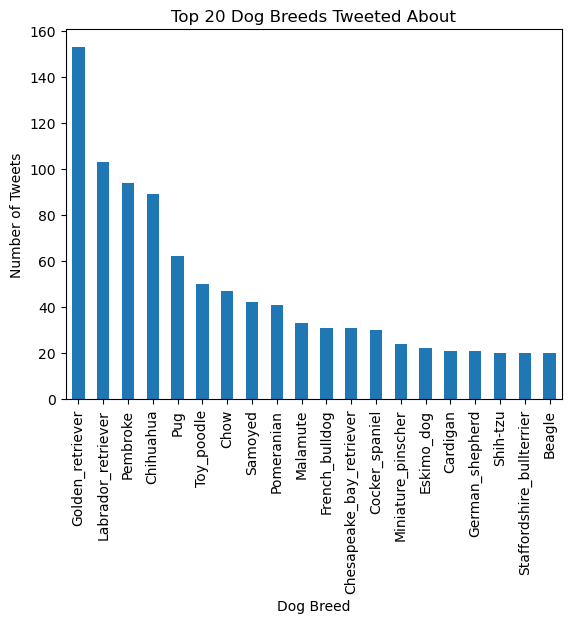

In [92]:
# setting the number

n_most_popular = 20

# grouping dog_breed and counting the number of tweets per breed

dog_breed_count = df_twitter_wrd.groupby('dog_breed')['tweet_id'].count().to_frame()
dog_breed_count['dog_breeds'] = dog_breed_count.index
dog_breed_count['count'] = dog_breed_count['tweet_id']
dog_breed_count = dog_breed_count[['dog_breeds', 'count']]

# sorting the count of tweets per breed to find the highest counts

dog_breed_count.sort_values('count', ascending=False, inplace=True)

# 20 most tweeted

dog_breed_count = dog_breed_count.iloc[:n_most_popular]

# creating the bar plot

dog_breed_count.plot(kind='bar',title = 'Top 20 Dog Breeds Tweeted About',xlabel='Dog Breed',ylabel = 'Number of Tweets',
                     legend=False)


#### Findings:

* Golden retrievers are by far the most tweeted dog breed.
* Labrador retrivers, pembrokes and chihauhua's are also tweeted about often.
* Other breeds are far less prevalent in tweets. 

### Plotting a time series to represent the number of tweets containing the 3 most tweeted dogs. 

<AxesSubplot:title={'center':'Rolling mean of number of tweets for 3 most tweeted dogs over time.'}, xlabel='Month and Year', ylabel='Average number of tweets'>

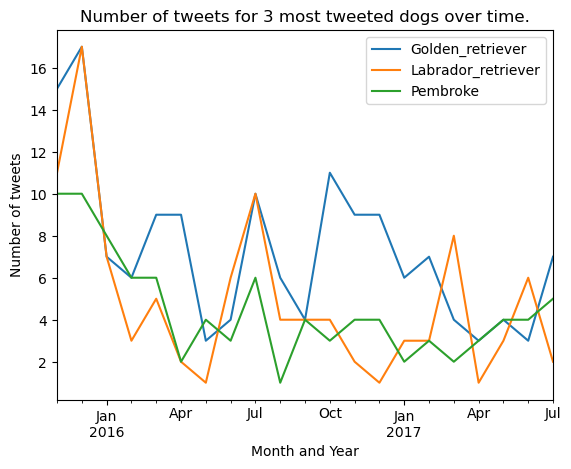

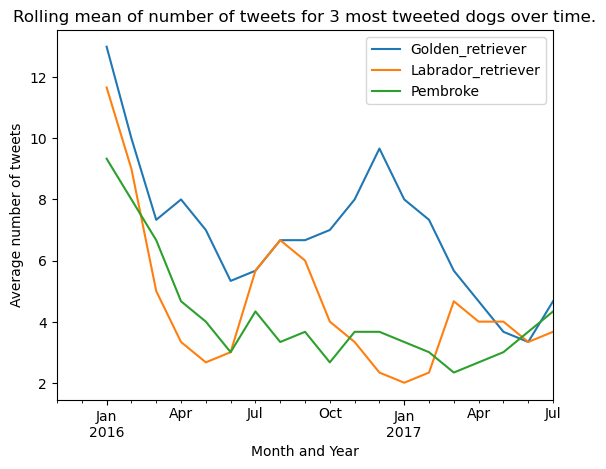

In [93]:
# creating filters to isolate the three most tweeted dogs based on the previous visualisation

filtr = df_twitter_wrd['dog_breed']=='Golden_retriever'

dog_tweets_m_y1 = df_twitter_wrd[filtr].groupby(['month_year']).agg(Golden_retriever= ('tweet_id', 'count'))

filtr2 = df_twitter_wrd['dog_breed']=='Labrador_retriever'

dog_tweets_m_y2 = df_twitter_wrd[filtr2].groupby(['month_year']).agg(Labrador_retriever= ('tweet_id', 'count'))

filtr3 = df_twitter_wrd['dog_breed']=='Pembroke'

dog_tweets_m_y3 = df_twitter_wrd[filtr3].groupby(['month_year']).agg(Pembroke= ('tweet_id', 'count'))

# concatinating the three new dataframes made based on the fileters

dog_tweets_m_y = pd.concat([dog_tweets_m_y1,dog_tweets_m_y2,dog_tweets_m_y3],axis=1)

# creating the first plot using the number of tweets for the 3 most tweeted dogs

dog_tweets_m_y.plot(kind='line',xlabel='Month and Year', ylabel = 'Number of tweets',title='Number of tweets for 3 most tweeted dogs over time.')

# calculating the rolling mean of the tweets for these dogs

dog_tweets_m_y = dog_tweets_m_y.rolling(3, axis=0).mean()

# plotting the rolling mean of the number of tweets for these dogs

dog_tweets_m_y.plot(kind='line',title='Rolling mean of number of tweets for 3 most tweeted dogs over time.',ylabel = 'Average number of tweets', xlabel='Month and Year')

#### Findings:

* Tweets containing these three dog breeds were high at the beginning of 2016.
* Only tweets containing golden retrievers spiked again at the beginning of 2017.
* Tweets containing labrador retrievers spiked again in August 2016.
* Tweets containing pembrokes were high at the beginning of the data period and gradually dropped until June 2016 after which it remained relatively low. 


### Plotting a bar graph to represent the dog breeds in the most popular tweets

<AxesSubplot:title={'center':'Mean of Top 10 favorited dog breeds tweeted about.'}, xlabel='Dog Breed', ylabel='Average number of favourites per tweet.'>

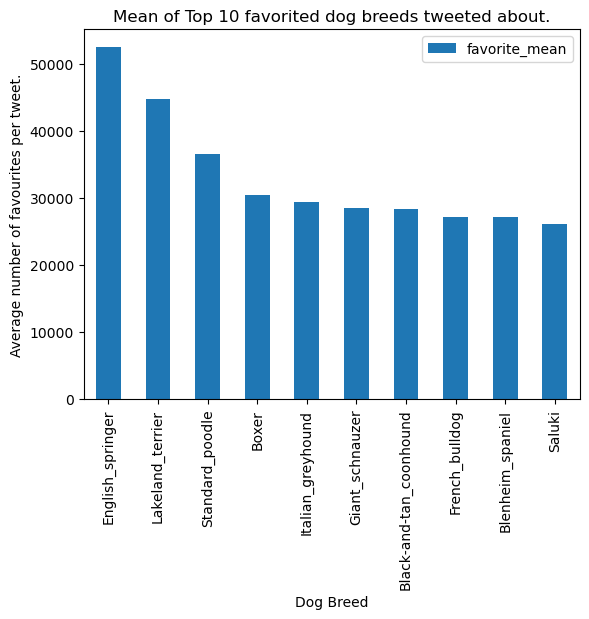

In [94]:
# Using the tweets favourite count, the 10 most popular dog breeds contained in tweets are identified


# setting the number of breeds for analysis
no_most_popular = 10

# grouping dog breeds and calculating their average favourite count per tweet 
# and assigning as to a new dataframe

dog_tweets_favorite_dogs = df_twitter_wrd.groupby(['dog_breed']).agg(favorite_mean= ('favorite_count', 'mean')).sort_values('favorite_mean', ascending=False)

# subsetting the dataframe to contain the number set above i.e. 10. 

dog_tweets_favorite_dogs = dog_tweets_favorite_dogs.iloc[:no_most_popular]

# creating a plot using the dog_tweets_favorite_dogs dataframe

dog_tweets_favorite_dogs.plot(kind='bar',title='Mean of Top 10 favorited dog breeds tweeted about.', xlabel = 'Dog Breed', ylabel = 'Average number of favourites per tweet.')

#### Findings:

* Interestingly the most favorited tweets didn't contain the top three most tweeted dog breeds.
* Tweets containing an English Springer were far more popular than the other dog breeds in our top ten list.
* Other dog breeds in the top 10 list had similar average favorite counts per tweet.


### Insights Summary:
1. Golden retrievers are by far the most tweeted dog breed.

2. The most favorited tweets didn't contain the top three most tweeted dog breeds.

3. Tweets containing English Springers received significantly more favorites than other dog breeds. 